# Reading and plotting graph-percolation data

## Importing the data

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import os

graph_sizes = [int(10**pow) for pow in range(2,6)]
graph_sizes = [100000]
data_dir = "Data\\"


In [83]:
file_names = ["g_mean_"+str(sizes)+".dat" for sizes in graph_sizes]
file_names = set(file_names) & set(os.listdir(data_dir))
graph_sizes = sorted([int(current_file.replace("g_mean_","").replace(".dat","")) for current_file in file_names])
print("Sizes to analyze: ", graph_sizes)
 

Sizes to analyze:  [100000]


In [84]:
sol_dict=dict({})

for i,current_file in enumerate(file_names):
    size = graph_sizes[i]
    current_file = data_dir+current_file
    try:
        sol_dict[size] = pd.read_csv(current_file, delimiter=",")
    except Exception as error_here:
        print("You got an error when either parsing the data file:", current_file)
        raise(error_here)
    sol_dict[size].columns = [col.replace(" ", "") for col in sol_dict[size].columns]

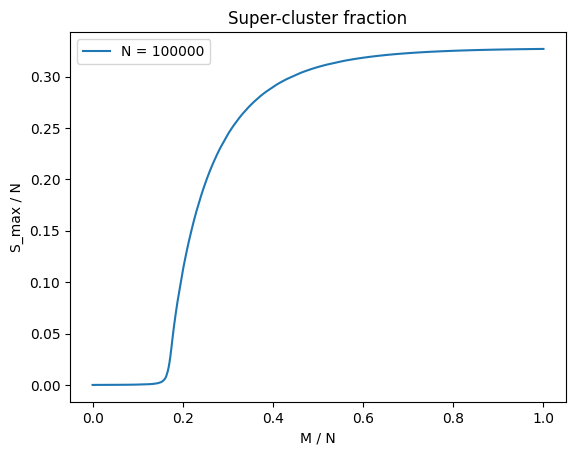

In [85]:
for size in reversed(graph_sizes):
    plt.plot(sol_dict[size]['c'], sol_dict[size]['Smax_mean'],label="N = "+str(size));
    
# Add legend, axis labels, and title if needed
plt.legend()  # Show the legend
plt.xlabel("M / N")  # Label for the x-axis
plt.ylabel("S_max / N")  # Label for the y-axis
plt.title("Super-cluster fraction")  # Optional title

plt.show()